# Submittable Interview Round 2

## Bryce Young

In [1]:
#Import the necessary libraries for the notebook.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

#Save the .csv as a dataframe with Pandas. The original dates have been formatted as YYYY-MM-DD.
csv_path='Submittable_Data_Formatted.csv'
df=pd.read_csv(csv_path)

df.head()

,accounttypename,createddate,numstaff,numtrialdays,term,canupgrade,active,tcv_custom,tcv_offshelf,formscreated,numunpaidsubmissionsthismonth,paid submissions,numbersubmissions,numberofemployeeswithaccess,customnumstaff,customnumunpaidsubmissions,Unnamed: 16
0,Custom Quote,2014-08-14 12:00 AM,0,0,year,False,True,NaN,3420.0,19,NaN,NaN,12708.0,2.0,2.0,100.0,4/9/10 12:00:00 AM
1,Inactive,2015-07-15 9:11 PM,2,0,month,True,True,NaN,NaN,3,NaN,NaN,NaN,1.0,NaN,NaN,11/9/10 12:00:00 AM
2,Custom Quote,2015-10-23 10:13 AM,0,0,year,False,True,854.8,925.0,12,2.0,NaN,1303.0,7.0,8.0,400.0,NaN
3,Premier72,2016-01-15 1:05 PM,20,14,month,True,False,NaN,2304.0,39,NaN,24413.0,611.0,20.0,NaN,NaN,NaN
4,Premier59,2015-08-19 11:46 AM,20,14,month,True,False,NaN,1888.0,17,12.0,NaN,3131.0,17.0,NaN,NaN,NaN


## 1. What account type has the highest number of submissions?

In [2]:
'''
The account with the highest number of submissions is 'Premier59'.
'''
#Group by account type and find the sum for the respective number of submissions.
total_submissions=df.groupby(['accounttypename'])[['numbersubmissions']].sum()
total_submissions

,numbersubmissions
accounttypename,
Basic,950.0
Boost,15186.0
Boost-annual,3443.0
Custom Quote,215779.0
Enterprise,45056.0
Enterprise Plus,50301.0
Enterprise200,61530.0
Free01,0.0
Growing_,4507.0


## 2. What active account type has the highest number of paid submissions?

In [3]:
'''
Custom Quote has the higheset number of paid submissions of the active accounts.
'''

#Filter out inactive accounts
active_paid=df[(df['active']== True)]

#Group first by 'active' then 'accounttypename'
active_paid=active_paid[['active','accounttypename','paid submissions']].groupby(['active','accounttypename']).sum()

#Print dataframe and review
active_paid

paid submissions
active accounttypename                      
True   Basic                            0.00
       Boost                       143345.00
       Boost-annual                  2530.00
       Custom Quote               1446781.07
       Enterprise                   26294.00
       Enterprise Plus              36837.78
       Inactive                    262514.64
       Premier                    1207505.34
       Premier Plus                 52838.00
       Premier Plus-annual          19625.00
       Premier-annual              138123.05
       Professional                 75328.00
       Professional-annual              0.00
       Starter                      65357.08
       vip                              0.00

## 3. What account type has the lowest tcv_offshelf value?

In [4]:
'''
Both 'Free01' and 'vip' account types have the lowest value of 0.0 (float64). Zeros aside, 'Basic' accounts have the lowest tcv at 931.0.
'''

#Group by 'accounttypename' and show only the sums of 'tcv_offshelf' values.
min_tcv_offshelf=df.groupby(['accounttypename'])[['tcv_offshelf']].sum()

#Print and review.
min_tcv_offshelf

,tcv_offshelf
accounttypename,
Basic,931.0
Boost,13342.0
Boost-annual,1071.0
Custom Quote,94715.0
Enterprise,29593.0
Enterprise Plus,3300.0
Enterprise200,25905.0
Free01,0.0
Growing_,6468.0


### Note: Of course, all three of the above functions could have been combined as follows

In [5]:
#Group by activity and account type and return the three columns in question. Store as 'sums'.
sums=df.groupby(['active','accounttypename'])['numbersubmissions','paid submissions','tcv_offshelf'].sum()

#Print the df.
sums

numbersubmissions  paid submissions  \
active accounttypename                                                
False  Enterprise200                      61530.0          85552.98   
       Free01                                 0.0              0.00   
       Growing_                            4507.0              0.00   
       Plus                                7188.0              0.00   
       Premier Plus 118                  148043.0         633740.28   
       Premier Plus 144                   38584.0            341.00   
       Premier Plus-annual 144             3072.0              0.00   
       Premier59                         267787.0        1621884.46   
       Premier72                         134053.0         954241.88   
       Professional29                      1335.0          43558.50   
True   Basic                                950.0              0.00   
       Boost                              15186.0         143345.00   
       Boost-annual                        3443.0           2530.00   
       Custom Quote                      215779.0        1446781.07   
       Enterprise                         45056.0          26294.00   
       Enterprise Plus                    50301.0          36837.78   
       Inactive                           61000.0         262514.64   
       Premier                            87287.0        1207505.34   
       Premier Plus                       29648.0          52838.00   
       Premier Plus-annual                13093.0          19625.00   
       Premier-annual                     31450.0         138123.05   
       Professional                        3141.0          75328.00   
       Professional-annual                 1061.0              0.00   
       Starter                             3790.0          65357.08   
       vip                                 1287.0              0.00   

                                tcv_offshelf  
active accounttypename                        
False  Enterprise200                 25905.0  
       Free01                            0.0  
       Growing_                       6468.0  
       Plus                           6567.0  
       Premier Plus 118              39810.0  
       Premier Plus 144              23741.0  
       Premier Plus-annual 144        2376.0  
       Premier59                    109744.0  
       Premier72                    110078.0  
       Professional29                 1654.0  
True   Basic                           931.0  
       Boost                         13342.0  
       Boost-annual                   1071.0  
       Custom Quote                  94715.0  
       Enterprise                    29593.0  
       Enterprise Plus                3300.0  
       Inactive                      88996.0  
       Premier                       79381.0  
       Premier Plus                  33293.0  
       Premier Plus-annual           21803.0  
       Premier-annual                45737.0  
       Professional                   2476.0  
       Professional-annual            2440.0  
       Starter                        1994.0  
       vip                               0.0

## 4. Average number of forms created per active account type

In [6]:
'''
The following table displays average forms created per account type. 
'''

#Save a dataframe with only active accounts.
average_forms=df[(df['active']== True)]

#Group by account type. Clean the dataframe to show only the necessary columns. 
average_forms=average_forms[['active','accounttypename','formscreated']].groupby(['active','accounttypename']).mean()

#Print the dataframe
average_forms

formscreated
active accounttypename                  
True   Basic                   14.000000
       Boost                   27.142857
       Boost-annual             8.000000
       Custom Quote            26.474227
       Enterprise              29.333333
       Enterprise Plus         11.000000
       Inactive                18.322034
       Premier                 13.305085
       Premier Plus            48.230769
       Premier Plus-annual     15.000000
       Premier-annual          18.000000
       Professional             3.000000
       Professional-annual      7.000000
       Starter                  6.333333
       vip                     20.000000

## 5. Find one or more errors in the dataset

1. numstaff=-1 or 0 for several accounts.
2. The 'createddate' column was not formatted in a way that the data could be sorted properly by date. Because the month came first, casting 'createddate' to list then sorting produced a list which began with all accounts created in January, then February, March, etc. This was not useful in finding correlations relating to createddate.
3. NaN values in 'numbersubmissions' and 'numberofemployeeswithaccess' must be replaced with numeric values in order to create useful visualizations.
4. 'Inactive' account types are all listed as 'active'==True. Perhaps not an error but this is confusing.
6. 'Custom Quote' and 'vip' account types are outliers in a number of groups. I do not have enough information to conclude if there are errors here or, on the other hand, if there is a way to re-work the data contained within these two account types to reduce their effect on the skewness of the data.

## 6. Find a simple correlation

In [7]:
'''
The following simple function charts the correlation of data by value. We can see that numstaff and numbersubmissions have a correlation coefficient of 0.26
'''

#Returns correlations of all the columns.
df.corr()

,numstaff,numtrialdays,canupgrade,active,tcv_custom,tcv_offshelf,formscreated,numunpaidsubmissionsthismonth,paid submissions,numbersubmissions,numberofemployeeswithaccess,customnumstaff,customnumunpaidsubmissions
numstaff,1.000000,0.704086,0.089939,-0.655323,-0.002105,0.376898,0.090177,0.197775,0.087587,0.260625,0.049913,-0.049041,-0.076278
numtrialdays,0.704086,1.000000,-0.011795,-0.591204,NaN,0.238186,0.088316,0.110192,0.046483,0.208195,0.096239,-0.046872,-0.051644
canupgrade,0.089939,-0.011795,1.000000,-0.453751,NaN,-0.177096,0.038742,-0.072286,-0.062891,-0.050013,-0.025249,-0.074221,-0.131537
active,-0.655323,-0.591204,-0.453751,1.000000,NaN,-0.198464,-0.179945,-0.097040,-0.126887,-0.241286,-0.217641,0.011556,0.029865
tcv_custom,-0.002105,NaN,NaN,NaN,1.000000,-0.135139,-0.016292,-0.033957,0.362881,-0.116669,0.039336,0.741681,0.266413
tcv_offshelf,0.376898,0.238186,-0.177096,-0.198464,-0.135139,1.000000,0.256473,0.151127,0.108678,0.340050,0.432332,0.636391,0.500500
formscreated,0.090177,0.088316,0.038742,-0.179945,-0.016292,0.256473,1.000000,0.152664,0.203490,0.186069,0.272799,0.017607,0.138896
numunpaidsubmissionsthismonth,0.197775,0.110192,-0.072286,-0.097040,-0.033957,0.151127,0.152664,1.000000,-0.005865,0.426779,0.325023,0.045050,0.106901
paid submissions,0.087587,0.046483,-0.062891,-0.126887,0.362881,0.108678,0.203490,-0.005865,1.000000,0.273321,0.383931,0.809631,0.029777
numbersubmissions,0.260625,0.208195,-0.050013,-0.241286,-0.116669,0.340050,0.186069,0.426779,0.273321,1.000000,0.372077,0.183944,0.693026


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/numpy/lib/histograms.py:708: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)


TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

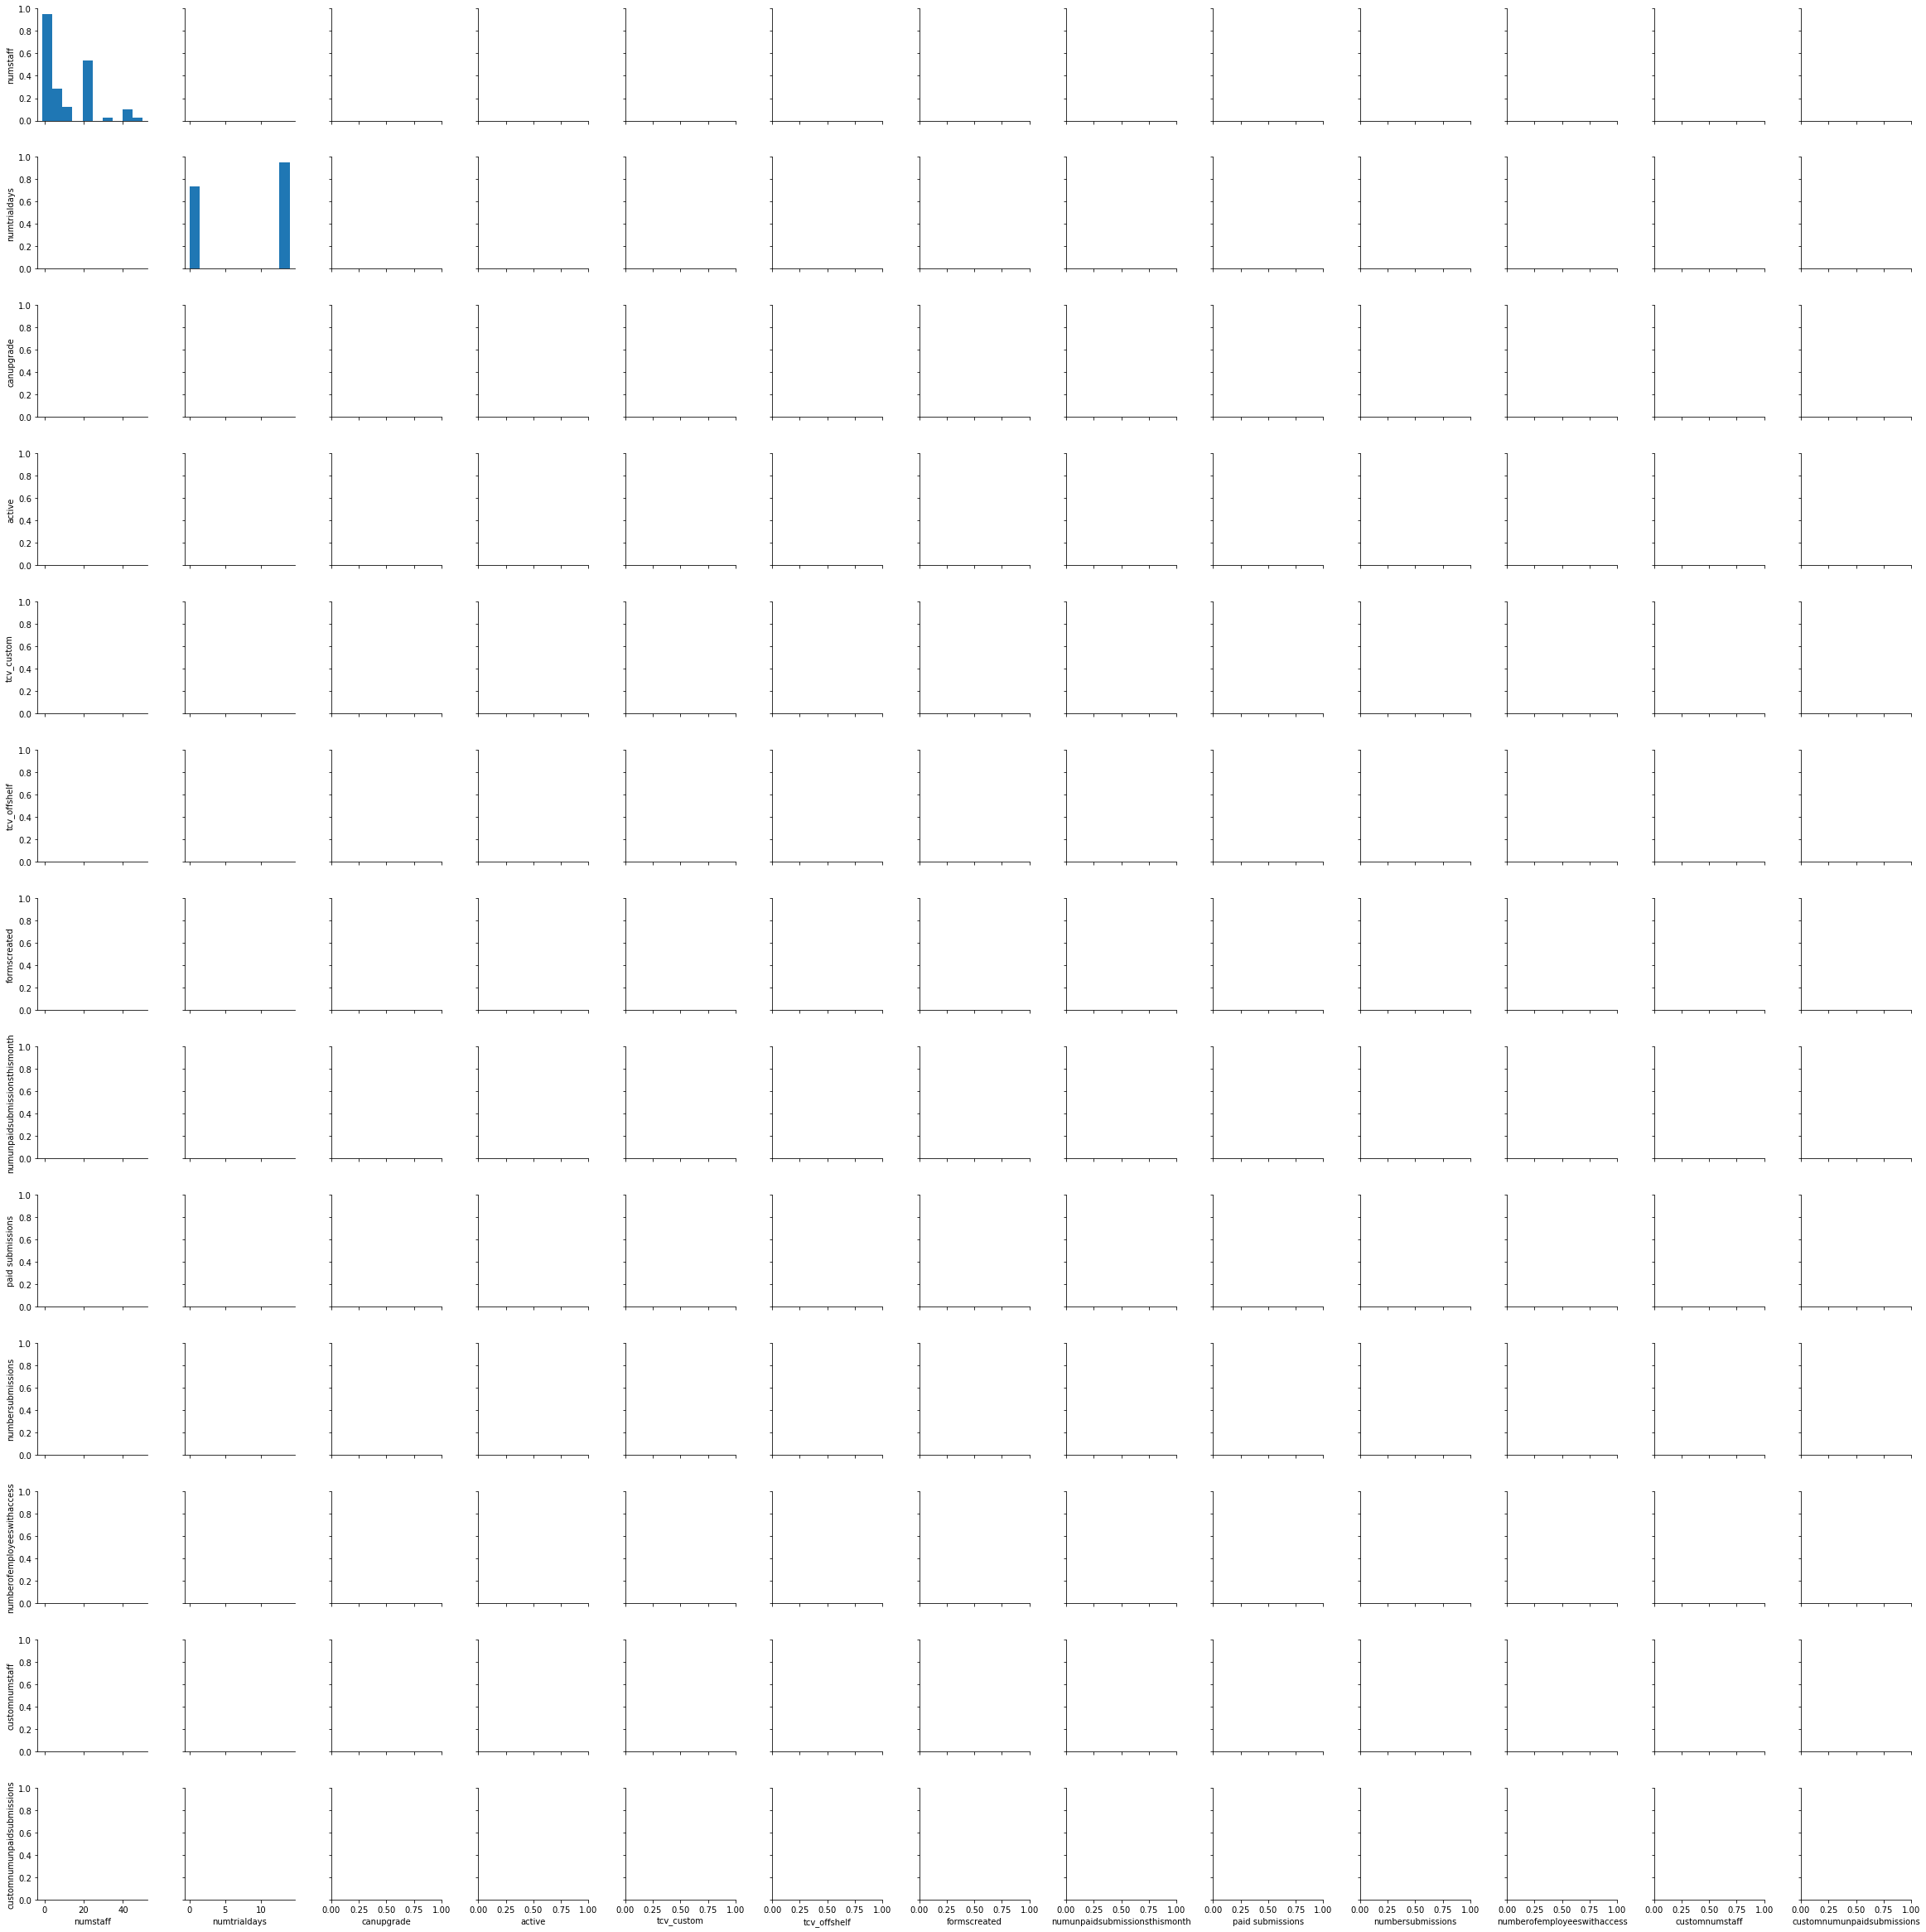

In [8]:
'''
The following simple function ought to return histograms and scatterplots for each relationship, but the data must be altered to run through the function. A couple of useless visualizations are produced.
'''

#To visualize your correlations.
sns.pairplot(df)

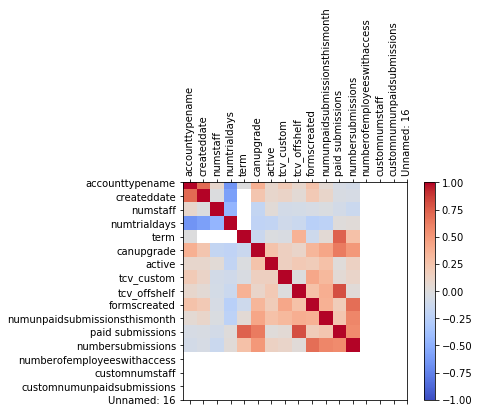

In [9]:
'''
The following function returns a visualization that is a little easier on the eyes, though it does not return exact values. From this particular visualization, we can get a general idea of the relative correlations in the dataset. Some values were not processed and would need to be altered/reformatted.
'''

#Another attempt to visualize correlations. This is simply easier to get info from than a chart of numbers.
corr=df.corr()
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(corr,cmap='coolwarm',vmin=-1,vmax=1)
fig.colorbar(cax)
ticks=np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

## 7. Find 3-5 Data Insights

_Note: In order to draw meaningful insights, I would first converse at length with Submittable's stakeholders to gain a good business understanding. A good understanding would include hypotheses that stakeholders have about certain data relationships, current business strategy, the specific questions that need answered, etc. I currently don't have the proper business understanding to draw insights with a satisfactory level of meaning for the business. The following are insights that I chose based on this quote by SciFi writer Isaac Asimov: "The most exciting phrase to hear in science, the one that heralds new discoveries, is not “Eureka!” (I found it!) but “That’s funny …”"_

1. Facts: More inactive accounts used trial days than active accounts. The average number of staff is greater for inactive accounts than for active accounts. The average number of forms created is greater for inactive accounts than for active accounts. The average number of paid submissions is greater for inactive accounts than for active accounts. Assuming Submittable is losing potential revenue on inactive accounts, these facts all indicate that Submittable's most valuable customers are inactive. This insight can be combined with Submittable's knowledge of each account to help Submittable market to these customers specifically prompting conversion to 'active'.

2. Curiously, outstanding outliers aside, the number of forms created per account shows a bell-shaped curve along a chronological access corresponding to date of account creation. The number of forms created per account reaches a peak with accounts created around 2014. This is an interesting finding that could mean many things, but it's hard to know here whether we are tracing the demand curve or the supply curve (or perhaps a conglomeration of both). 

    Let's link this back to insight No.1. If we separate the active accounts from the inactive accounts and find the range of the dates during which each group was created, we can get an idea of customer retention. As it turns out, *inactive* accounts represent 56% of accounts created before 2013, 51% of accounts created in 2013-2015, but only 12% of accounts created after 2015. 

      There are many useful conclusions that can be drawn from this figure: it is clear that the number of accounts created has increased since 2010. Furthermore, Submittable is improving its track record of keeping accounts active. However, the number of forms created per account has declined.  Now I want to tie this figure in with customer retention and the value of those customers.

    In the periods 'Before 2013', '2013-2015', and 'After 2015', the average forms created per *active* account are 32, 36, and 13, respectively. Per *inactive* account, the numbers are 37, 40, and 31, respectively. All in all, Submittable is adding more accounts with time, but there are less forms being created for newer accounts. Furthermore, the more recently created active accounts have far fewer forms created per account (the modes are 2 and 3) than new inactive accounts (the modes are 7 and 8). 

    Given a lack of understanding of Submittable's business model, I do not know what this means for business, but the finding is interesting. I would like to learn more and to track these figures over time. 

3. The number of trial days seems to have a negative correlation with time. On average, newer customers are not capitalizing on trial days. This increases the efficiency of business (not as many staff required) but may have a negative impact on customer conversion if it can be shown that free trials increase conversion rates. As it happens, accounts that are currently inactive used more trial days than currently active accounts (both on average and as a total). The actionable item here is that the fourteen-day trial needs to more effectively convert trial members into paying customers. 

4. Of all active account types, 'Premier Plus' has by far the largest average number of forms created. On average, Premier Plus accounts also belong to companies with more employees than the average active account.

5. Per account, number of staff has a positive correlation with number of submissions. With this knowledge, Submittable can improve internal operations and customer service by being prepared to handle x amount of submissions based on number of company staff. Number of staff may itself be a misleading variable. Further investigation is needed to find out if numstaff corresponds to the company's revenue or net income.

_Note: By graphing the number of accounts created by date over time. We can compare this to data such as total stock market index or even by season to determine relationships between accounts created and forces outside of Submittable's control. With this knowledge, Submittable may plan for responses to market forces or, as it were, weather._


## 8. Create two visualizations about insights

In [10]:
csv_path='activity_totals.csv'
activity_totals=pd.read_csv(csv_path)
activity_totals=activity_totals[0:6][['Activity','Variable','Total']]

In [11]:
csv_path='active_averages.csv'
active_averages=pd.read_csv(csv_path)
active_averages=active_averages[0:6][['Activity','Variable','Averages']]

Text(0.5, 0.98, 'Totals: Active vs Inactive Accounts')

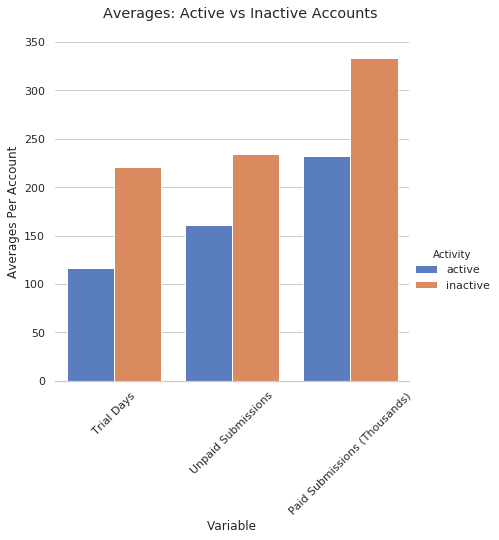

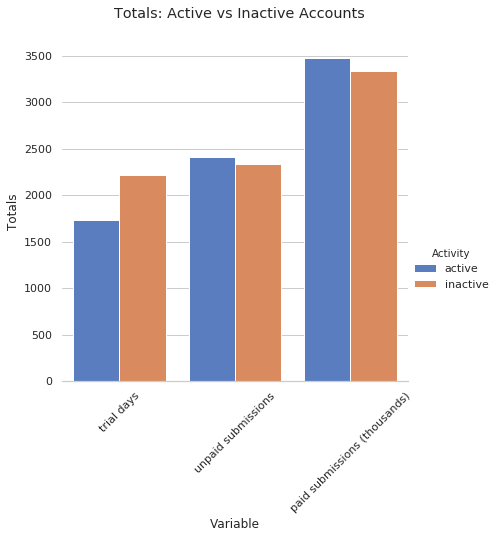

In [12]:
sns.set(style="whitegrid")

active = active_averages

g = sns.catplot(x="Variable", y="Averages", hue="Activity", data=active,
                height=6, kind="bar", palette="muted")
plt.xticks(rotation=45)
g.despine(left=True)
g.set_ylabels("Averages Per Account")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Averages: Active vs Inactive Accounts')

sns.set(style="whitegrid")

activity = activity_totals

g = sns.catplot(x="Variable", y="Total", hue="Activity", data=activity,
                height=6, kind="bar", palette="muted")
plt.xticks(rotation=45)
g.despine(left=True)
g.set_ylabels("Totals")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Totals: Active vs Inactive Accounts')

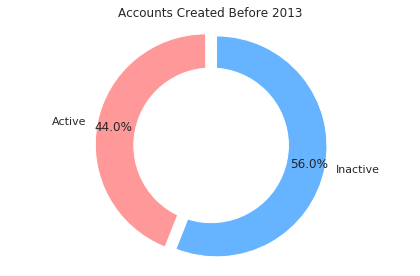

In [13]:
labels = ['Active', 'Inactive']
sizes = [44, 56]

colors = ['#ff9999','#66b3ff']

explode = (0.05,0.05)

fig1, ax1=plt.subplots()
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

plt.title('Accounts Created Before 2013')

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

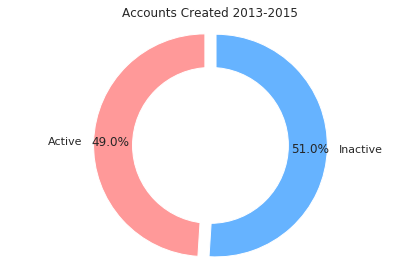

In [14]:
labels = ['Active', 'Inactive']
sizes = [49, 51]

colors = ['#ff9999','#66b3ff']

explode = (0.05,0.05)

fig1, ax1=plt.subplots()
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

plt.title('Accounts Created 2013-2015')

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

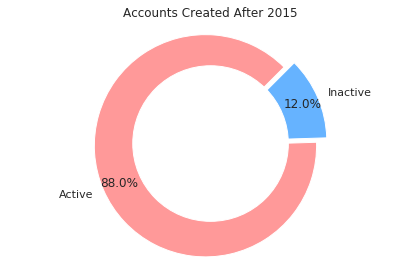

In [15]:
labels = ['Active', 'Inactive']
sizes = [88, 12]

colors = ['#ff9999','#66b3ff']

explode = (0.05,0.05)

fig1, ax1=plt.subplots()
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=45, pctdistance=0.85, explode = explode)

plt.title('Accounts Created After 2015')

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

Text(0.5, 0.98, 'Forms Created Over Time')

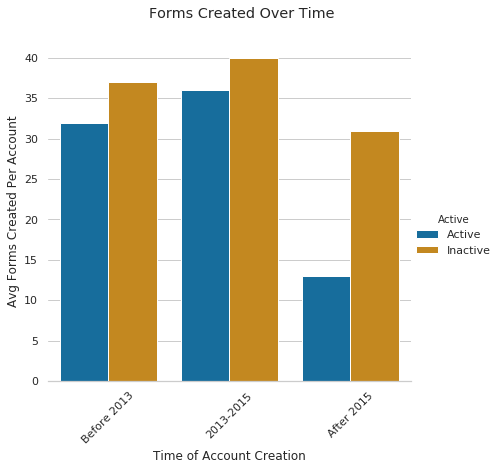

In [16]:
csv_accts='acctavgs.csv'
acctavgs=pd.read_csv(csv_accts)

g = sns.catplot(x='Time', y="Average", hue="Active", data=acctavgs,
                height=6, kind="bar", palette="colorblind")
plt.xticks(rotation=45)
g.despine(left=True)
g.set_xlabels("Time of Account Creation")
g.set_ylabels("Avg Forms Created Per Account")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Forms Created Over Time')

## 9. What account is created more frequently on Friday? Create a data visualization and describe how you found that.

### Pt. 1: The Process

In [17]:
'''
I was able to count the amount of instances of accounts created on Friday by adding a column of Fridays (occuring in the createddate range) to the original xlsx file and exporting as Fridays.csv. I then did the following:
'''

csv_path='Fridays.csv'
Fridays_df=pd.read_csv(csv_path)
Fridays_df=Fridays_df[['accounttypename','createddate','Fridays']]
Fridays_df.head()

,accounttypename,createddate,Fridays
0,Custom Quote,2014-08-14,2010-04-09
1,Inactive,2015-07-15,2010-04-16
2,Custom Quote,2015-10-23,2010-04-23
3,Premier72,2016-01-15,2010-04-30
4,Premier59,2015-08-19,2010-05-07


In [18]:
createddate_set=set(Fridays_df['createddate']) #Cast createddate column to set
Fridays_set=set(Fridays_df['Fridays']) #Cast Fridays column to set
Friday_creations_set=Fridays_set&createddate_set #Find the union of the two sets
len(Friday_creations_set)

65

In [19]:
'''
Unfortunately I was unable to figure out the corresponding values under 'accounttypename'.
Here is what I did to come close to the solution.
'''

#Finding corresponding value under column 'accounttypename'.
Fridays_df.loc[Fridays_df['createddate'] == '2010-04-09','accounttypename']

125    Premier59
Name: accounttypename, dtype: object

In [20]:
#Does not return series for multiple inputs. Ex:
Fridays_df.loc[Fridays_df['createddate'] == ('2010-04-09','2011-10-21'),'accounttypename']

Series([], Name: accounttypename, dtype: object)

_The solution here must be simple, but I was unable to solve the problem._

_Of course, I could run the code 65 times, changing the input to the next item on the list of Friday creations. 
Instead, I tried a **for** loop._

In [21]:
Friday_creations_list=['2010-04-09',
 '2011-10-21',
 '2012-01-13',
 '2012-02-24',
 '2012-09-21',
 '2013-02-15',
 '2013-04-12',
 '2013-05-17',
 '2013-07-12',
 '2013-09-06',
 '2014-01-17',
 '2014-01-24',
 '2014-01-31',
 '2014-02-28',
 '2014-03-14',
 '2014-04-04',
 '2014-05-30',
 '2014-08-29',
 '2014-09-12',
 '2014-09-26',
 '2014-10-10',
 '2014-10-31',
 '2015-01-09',
 '2015-01-16',
 '2015-01-30',
 '2015-02-27',
 '2015-05-01',
 '2015-05-15',
 '2015-05-22',
 '2015-09-11',
 '2015-09-25',
 '2015-10-02',
 '2015-10-23',
 '2015-12-04',
 '2016-01-15',
 '2016-01-22',
 '2016-02-05',
 '2016-02-12',
 '2016-02-19',
 '2016-06-10',
 '2016-08-12',
 '2016-09-16',
 '2016-10-07',
 '2016-10-14',
 '2016-11-04',
 '2016-11-18',
 '2016-12-16',
 '2017-01-06',
 '2017-02-24',
 '2017-03-10',
 '2017-06-09',
 '2017-07-07',
 '2017-09-01',
 '2017-09-29',
 '2017-11-17',
 '2017-12-22',
 '2018-01-05',
 '2018-01-19',
 '2018-02-02',
 '2018-02-09',
 '2018-03-02',
 '2018-03-09',
 '2018-08-03',
 '2018-08-17',
 '2018-09-14']

In [22]:
accounttypename_fridays=[]
for i in Friday_creations_list:
    i=0
    accounttypename_fridays.append(Fridays_df.loc[Fridays_df['createddate'] == Friday_creations_list[i],'accounttypename'])
    i=i+1

In [23]:
len(accounttypename_fridays)

65

In [24]:
accounttypename_fridays

[125    Premier59
 Name: accounttypename, dtype: object, 125    Premier59
 Name: accounttypename, dtype: object, 125    Premier59
 Name: accounttypename, dtype: object, 125    Premier59
 Name: accounttypename, dtype: object, 125    Premier59
 Name: accounttypename, dtype: object, 125    Premier59
 Name: accounttypename, dtype: object, 125    Premier59
 Name: accounttypename, dtype: object, 125    Premier59
 Name: accounttypename, dtype: object, 125    Premier59
 Name: accounttypename, dtype: object, 125    Premier59
 Name: accounttypename, dtype: object, 125    Premier59
 Name: accounttypename, dtype: object, 125    Premier59
 Name: accounttypename, dtype: object, 125    Premier59
 Name: accounttypename, dtype: object, 125    Premier59
 Name: accounttypename, dtype: object, 125    Premier59
 Name: accounttypename, dtype: object, 125    Premier59
 Name: accounttypename, dtype: object, 125    Premier59
 Name: accounttypename, dtype: object, 125    Premier59
 Name: accounttypename, dtype:

_Unfortunately, all 65 values are '125    Premier59
 Name: accounttypename, dtype: object'._

 _After many hours of research and trials,
I would ask for help at this time._

_In order to satisfy the answer, I was able to solve this problem on pen and paper, to discover that there are in fact **66** instances of accounts created on Fridays (on 11/4/2016, two accounts were created) and that **the account type created most frequently on Friday is Custom Quote** which makes up 25.76% of accounts created on Fridays._

### Pt. 2: Visualization

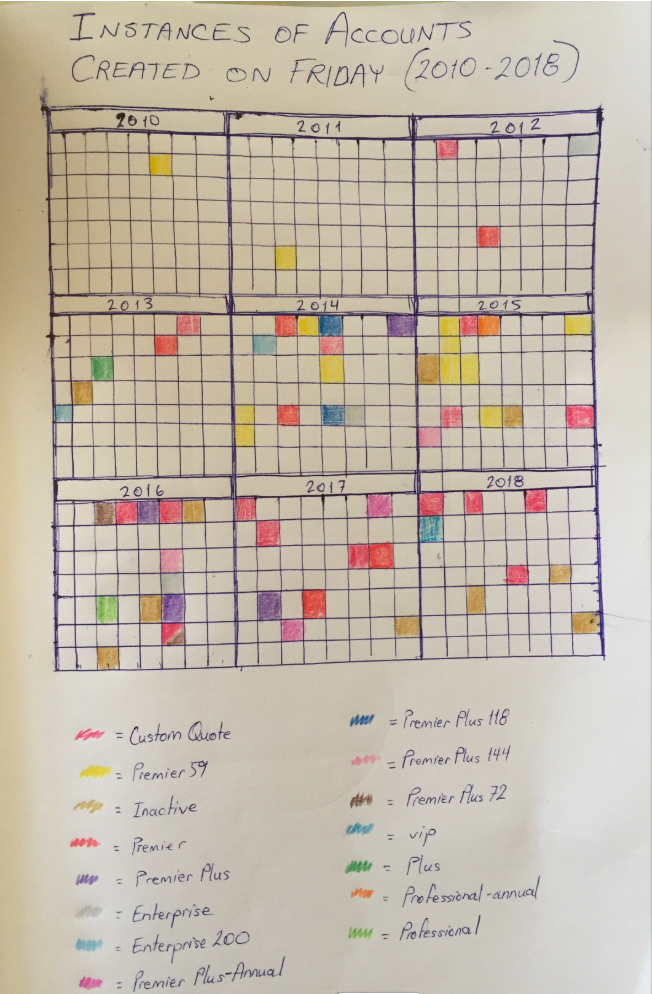

In [25]:
'''
My goal was to link the following calendar with the pie chart below it. The user could select the account type from the legend to isolate and display a specific account type on both the calendar and the pie chart. However the task seemed impractical (the juice was not worth the squeeze) given the low ratio of amount of extra information this could convey to the amount of effort needed to learn and design the function to exectute it. Here is a drawing of the calendar. A rendering of the pie chart is below.
'''

from PIL import Image
im = Image.open("Screen Shot.png")
im

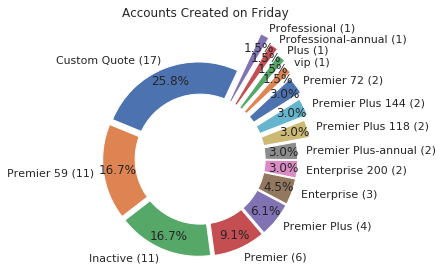

In [26]:
labels = ['Custom Quote (17)', 'Premier 59 (11)','Inactive (11)','Premier (6)','Premier Plus (4)','Enterprise (3)','Enterprise 200 (2)','Premier Plus-annual (2)','Premier Plus 118 (2)','Premier Plus 144 (2)','Premier 72 (2)','vip (1)','Plus (1)','Professional-annual (1)','Professional (1)']
sizes = [25.76,16.67,16.67,9.09,6.06,4.55,3.03,3.03,3.03,3.03,3.03,1.52,1.52,1.52,1.52]

explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.2,0.25,0.3,0.35,0.4,0.45,0.5)

fig1, ax1=plt.subplots()
 
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=65, pctdistance=0.85, explode = explode)

plt.title('Accounts Created on Friday')

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

# 10. Group all inactive Premier plans together and report the number of employees with access.

In [27]:
'''
There are no inactive 'Premier' accounts in the dataset, so I grouped all inactive accounts that start with 'Premier'. 
The answer is 2028.
'''

ipdf=df.loc[df['accounttypename'].str.startswith('Premier') & (df['active'] == False)] #Select acct names that start with 'Premier'
ipdf['numberofemployeeswithaccess'].sum() #Find sum of number of employees with access.

2028.0